In [1]:
import pandas as pd
import sys
import numpy as np
import pickle
from pycaret.classification import * 
import seaborn as sns
import matplotlib.pyplot as plt

#sys.path.append("../tools/")
from final_project.tester import dump_classifier_and_data
from tools.feature_format import featureFormat, targetFeatureSplit


# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from final_project.tester import test_classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances',
                 'bonus', 'restricted_stock_deferred', 'deferred_income',
                 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'other', 'long_term_incentive', 'restricted_stock', 'director_fees',
                 'to_messages', 'from_poi_to_this_person', 'from_messages',
                 'from_this_person_to_poi', 'shared_receipt_with_poi'] 

### Load the dictionary containing the dataset
with open("final_project/final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)



In [2]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)

In [3]:
### converting the data to df for some analysis and exploration
my_data = pd.DataFrame(data, columns=features_list)
my_data.head()

,poi,salary,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,exercised_stock_options,other,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi
0,0.0,201955.0,2869717.0,4484442.0,0.0,4175000.0,-126027.0,-3081055.0,1729541.0,13868.0,1729541.0,152.0,304805.0,126027.0,0.0,2902.0,47.0,2195.0,65.0,1407.0
1,0.0,0.0,178980.0,182466.0,0.0,0.0,0.0,0.0,257817.0,3486.0,257817.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,477.0,0.0,916197.0,0.0,0.0,-560222.0,-5104.0,5243487.0,56301.0,4046157.0,864523.0,0.0,1757552.0,0.0,566.0,39.0,29.0,0.0,465.0
3,0.0,267102.0,1295738.0,5634343.0,0.0,1200000.0,0.0,-1386055.0,10623258.0,11200.0,6680544.0,2660303.0,1586055.0,3942714.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,239671.0,260455.0,827696.0,0.0,400000.0,-82782.0,-201641.0,63014.0,129142.0,0.0,69.0,0.0,145796.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# inspect info
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   poi                        145 non-null    float64
 1   salary                     145 non-null    float64
 2   deferral_payments          145 non-null    float64
 3   total_payments             145 non-null    float64
 4   loan_advances              145 non-null    float64
 5   bonus                      145 non-null    float64
 6   restricted_stock_deferred  145 non-null    float64
 7   deferred_income            145 non-null    float64
 8   total_stock_value          145 non-null    float64
 9   expenses                   145 non-null    float64
 10  exercised_stock_options    145 non-null    float64
 11  other                      145 non-null    float64
 12  long_term_incentive        145 non-null    float64
 13  restricted_stock           145 non-null    float64

In [5]:
### find how many values are missing in each column
selected_features_missing = []
for col in features_list[1:]:
  missing_vals = len(my_data[col][np.where(my_data[col]==0)[0]])
  total_vals = len(my_data[col])
  ptc_missing = missing_vals / total_vals
  if ptc_missing < 0.25:
    selected_features_missing.append(col)
  print(f'{col} = {ptc_missing:.2f}%')

salary = 0.34%
deferral_payments = 0.73%
total_payments = 0.14%
loan_advances = 0.97%
bonus = 0.43%
restricted_stock_deferred = 0.88%
deferred_income = 0.66%
total_stock_value = 0.13%
expenses = 0.34%
exercised_stock_options = 0.30%
other = 0.36%
long_term_incentive = 0.54%
restricted_stock = 0.24%
director_fees = 0.88%
to_messages = 0.41%
from_poi_to_this_person = 0.49%
from_messages = 0.41%
from_this_person_to_poi = 0.54%
shared_receipt_with_poi = 0.41%


In [6]:
selected_features_missing

['total_payments', 'total_stock_value', 'restricted_stock']

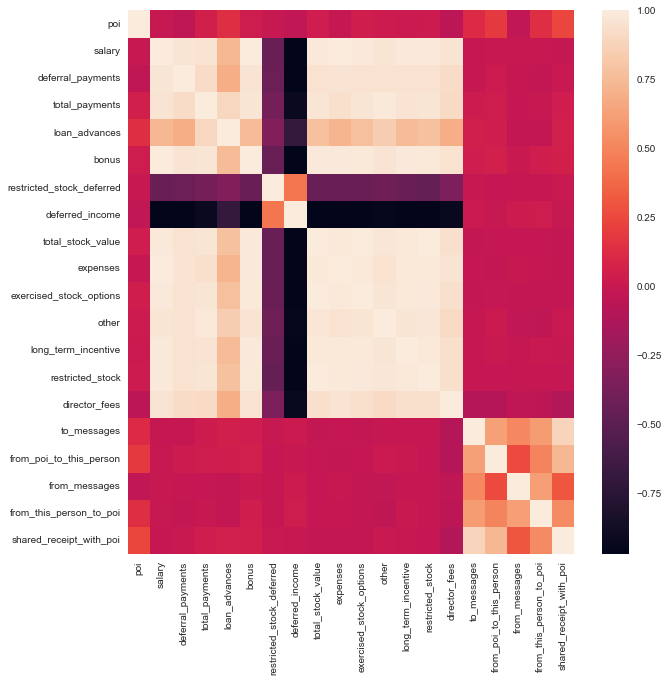

In [7]:
### find the correlation in features
plt.figure(figsize=(10, 10))
sns.heatmap(my_data.corr());

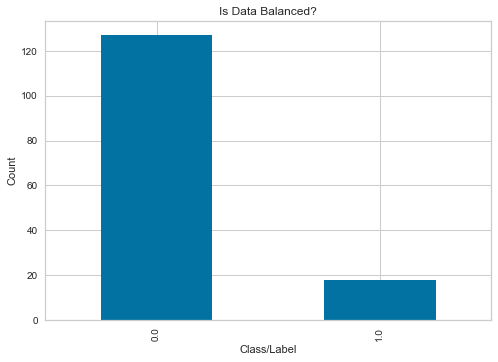

In [8]:
### is data really balanced?
plt.title('Is Data Balanced?')
plt.xlabel('Class/Label')
plt.ylabel('Count')
my_data['poi'].value_counts().plot.bar();

In [9]:
pd.DataFrame(data_dict).T['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

Data is very much imbalanced and more biased to class 0.

In [10]:
### Task 2: Remove outliers
### Task 3: Create new feature(s)

### modeling experiments
1. Take all the data as it is and find the baseline model.

In [11]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

In [20]:
experiment = setup(my_data, target='poi')  
best_model = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8536,0.6986,0.3500,0.3000,0.3000,0.2291,0.2444,0.0100
nb,Naive Bayes,0.4055,0.5799,0.9000,0.1563,0.2616,0.0830,0.1789,0.0030
gbc,Gradient Boosting Classifier,0.8518,0.6417,0.2500,0.1750,0.1733,0.1294,0.1519,0.0080
ridge,Ridge Classifier,0.8718,0.0000,0.1500,0.2000,0.1667,0.1282,0.1333,0.0020
lda,Linear Discriminant Analysis,0.8518,0.5410,0.1500,0.2000,0.1667,0.1197,0.1222,0.0030
dt,Decision Tree Classifier,0.7918,0.5326,0.2000,0.1250,0.1400,0.0429,0.0509,0.0030
lightgbm,Light Gradient Boosting Machine,0.8518,0.5667,0.2000,0.1000,0.1333,0.0828,0.0946,0.0050
et,Extra Trees Classifier,0.8618,0.6892,0.1000,0.1000,0.1000,0.0667,0.0667,0.0840
lr,Logistic Regression,0.7918,0.5924,0.1500,0.0750,0.0900,0.0137,0.0178,0.0160
knn,K Neighbors Classifier,0.8818,0.6642,0.0000,0.0000,0.0000,0.0000,0.0000,0.0250


In [ ]:
best_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=8895)

#### best model found in first experiment
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=8895)

In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
best_model = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=8895)

In [14]:
### testing the best model with tester code
### splitting the selected data into X(features-independent vars) and y (labels-dependent vars)
labels, features = targetFeatureSplit(my_data.values)


In [15]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

precision, recall, accuracy = test_classifier(best_model, my_dataset, features_list, folds=200)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')
print()

Precision: 0.3824451410658307
Recall: 0.305
Accuracy: 0.8416666666666667



#CELL ABOVE WAS THE FINAL AND LAST CELL -- ALL CELLS BELOW ARE FOR TESTING AN EXPERIMENTATION ONLY

In [ ]:
clfs = [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=0,
            splitter='best'),
        LogisticRegression(max_iter=10000), GaussianNB(), SVC(), RandomForestClassifier(), GradientBoostingClassifier()]




## classifiers evaluation using the method from tester.py
for clf in clfs:
  precision, recall, accuracy = test_classifier(clf, my_dataset, features_list, folds=100)
  print(f'Precision of {clf}: {precision}')
  print(f'Recall of {clf}: {recall}')
  print(f'Accuracy of {clf}: {accuracy}')
  print()

# Example starting point. Try investigating other evaluation techniques!
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)



### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

#dump_classifier_and_data(clf, my_dataset, features_list)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
import numpy as np
selected_clf = RandomForestClassifier()
random_param_grid = {'max_features': ["auto", "sqrt"], 
                     'n_estimators': [5, 50, 100, 200, 300],
                     'max_depth': [int(x) for x in np.linspace(10, 120, num=12)],
                     'min_samples_split': [2, 6, 8],
                     'min_samples_leaf': [1, 3, 6],
                     'bootstrap': [True, False]}

rfc_random = RandomizedSearchCV(selected_clf, random_param_grid, n_iter=200, 
                                cv=5, random_state=42, n_jobs=-1, verbose=1, scoring='average_precision')
              

In [ ]:
rfc_random.fit(features, labels)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 6],
                                        'min_samples_split': [2, 6, 8],
                                        'n_estimators': [5, 50, 100, 200, 300]},
                   random_state=42, scoring='average_precision', verbose=1)

In [ ]:
rfc_random.best_params_

In [ ]:
final_clf = RandomForestClassifier()
final_clf.set_params(**rfc_random.best_params_)

In [ ]:
precision, recall, accuracy = test_classifier(final_clf, my_dataset, features_list, folds=100)
print(f'Precision of {final_clf}: {precision}')
print(f'Recall of {final_clf}: {recall}')
print(f'Accuracy of {final_clf}: {accuracy}')

In [ ]:
gbc_tuned = GradientBoostingClassifier(random_state=0)
random_param_grid = {"n_estimators":[5,50,250,500, 1000, 2000],
                    "max_depth":[1,3,5,7,9],
                     "learning_rate":[0.01,0.1,1,10,100]
}

gbc_random = RandomizedSearchCV(gbc_tuned, random_param_grid, n_iter=300, 
                                cv=3, random_state=42, n_jobs=-1, verbose=1, scoring='f1')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaller = MinMaxScaler()
features = scaller.fit_transform(features)

In [ ]:
gbc_random.fit(features, labels)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 150 is smaller than n_iter=300. Running 150 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [5, 50, 250, 500, 1000,
                                                         2000]},
                   random_state=42, scoring='f1_weighted', verbose=1)

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
gbc_random.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

array([[0.00000000e+00, 7.56265983e-03, 9.23453242e-02, ...,
        6.28179902e-03, 2.05415103e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.74544552e-03, ...,
        0.00000000e+00, 1.95934169e-02, 0.00000000e+00],
       [0.00000000e+00, 1.78623393e-05, 3.18462472e-03, ...,
        0.00000000e+00, 3.28153718e-02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 3.18462472e-03, ...,
        0.00000000e+00, 1.95934169e-02, 0.00000000e+00],
       [1.00000000e+00, 5.93175710e-03, 3.18462472e-03, ...,
        0.00000000e+00, 4.64969932e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.18462472e-03, ...,
        0.00000000e+00, 1.95934169e-02, 0.00000000e+00]])

In [ ]:
#best so far {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}
gbc_tuned = GradientBoostingClassifier(random_state=42)
gbc_tuned.set_params(**gbc_random.best_params_)
precision, recall, accuracy = test_classifier(gbc_tuned, my_dataset, features_list, folds=100)
print(f'Precision of {gbc_tuned}: {precision}')
print(f'Recall of {gbc_tuned}: {recall}')
print(f'Accuracy of {gbc_tuned}: {accuracy}')

Precision of GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=500,
                           random_state=42): 0.3333333333333333
Recall of GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=500,
                           random_state=42): 0.07
Accuracy of GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=500,
                           random_state=42): 0.7622222222222222
